In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import astropy.io.fits as pf
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import HoverTool, BoxSelectTool, Range1d
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
data = pd.read_csv('tabby_data.csv', sep=',') # Read the CSV file into a Pandas dataframe

In [3]:
data.head()

,Filename,Date,Elevation,Azimuth,Intensity,Observation Time,SNR
0,Tabby's Spectra/ucb-amp193.fits,2015-11-21T02:59:05.20,58.385700,296.272308,76.142857,1800.0,9.680418
1,Tabby's Spectra/ucb-amp194.fits,2015-11-21T03:32:08.51,52.507401,297.008698,55.642857,1800.0,9.550406
2,Tabby's Spectra/ucb-aot266.fits,2016-03-24T10:51:51.65,32.864101,56.171299,9.571429,1800.0,1.763978
3,Tabby's Spectra/ucb-aot271.fits,2016-03-24T11:38:33.32,40.758099,59.581200,12.142857,1800.0,1.957226
4,Tabby's Spectra/ucb-aoz236.fits,2016-04-04T09:55:09.85,30.658800,55.066799,55.714286,1800.0,4.475166


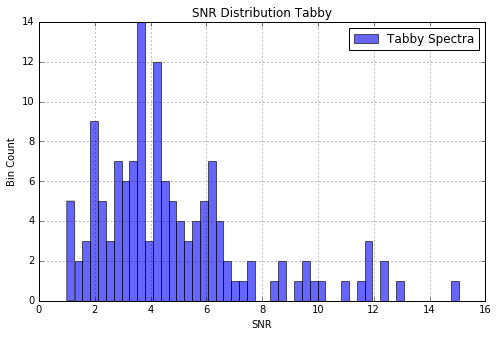

In [4]:
data["SNR"].hist(bins=50, figsize=(8,5), edgecolor='black',alpha=0.6,label='Tabby Spectra')
plt.title("SNR Distribution Tabby")
plt.ylabel("Bin Count")
plt.xlabel("SNR")
plt.legend()

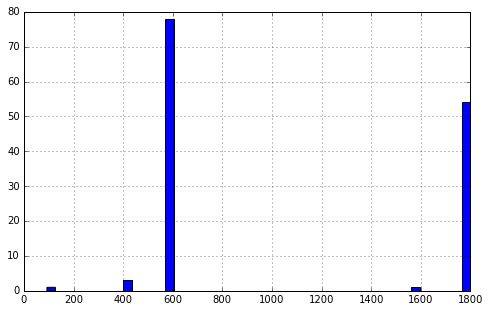

In [5]:
data["Observation Time"].hist(bins=50, figsize=(8,5), edgecolor='black') # Used the pandas .hist

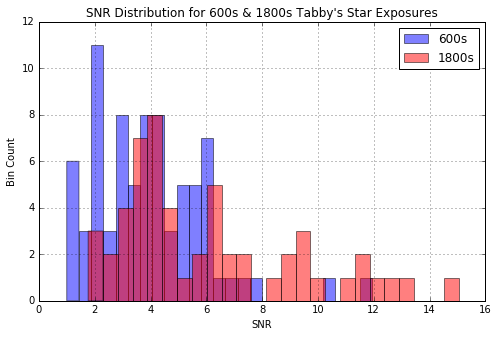

In [6]:
# Show SNR distribution for 600s and 1800s observation times

exp_600 = data.loc[data['Observation Time'] == 600.0]
exp_1800 = data.loc[data['Observation Time'] == 1800.0]

exp_600['SNR'].hist(bins=25, figsize=(8,5),color='b',alpha=0.5, label = '600s', edgecolor='black')
exp_1800['SNR'].hist(bins=25, figsize=(8,5),color='r',alpha=0.5, label = '1800s', edgecolor='black')

plt.title("SNR Distribution for 600s & 1800s Tabby's Star Exposures")
plt.ylabel("Bin Count")
plt.xlabel("SNR")
plt.legend()

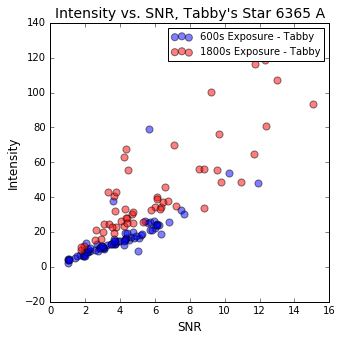

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(exp_600["SNR"], exp_600["Intensity"], s = 50, c = 'b', alpha = 0.5, picker=True, label="600s Exposure - Tabby")
plt.scatter(exp_1800["SNR"], exp_1800["Intensity"],  s = 50, c = 'r', alpha = 0.5, picker=True, label="1800s Exposure - Tabby")
plt.ylabel('Intensity',fontsize=12)
plt.xlabel('SNR',fontsize=12)
plt.title("Intensity vs. SNR, Tabby's Star 6365 A",fontsize=14)
plt.legend(fontsize=10)

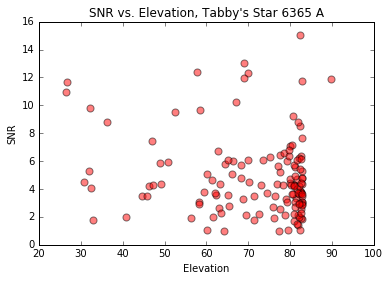

In [8]:
plt.scatter(data["Elevation"], data["SNR"], s = 50, c = 'r', alpha = 0.5)
plt.ylabel('SNR')
plt.xlabel('Elevation')
plt.title("SNR vs. Elevation, Tabby's Star 6365 A")

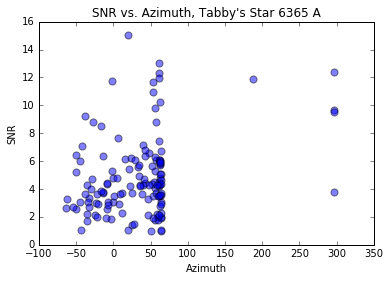

In [9]:
plt.scatter(data["Azimuth"], data["SNR"], s = 50, c = 'b', alpha = 0.5)
plt.ylabel('SNR')
plt.xlabel('Azimuth')
plt.title("SNR vs. Azimuth, Tabby's Star 6365 A")

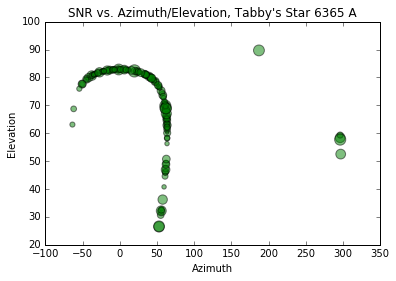

In [10]:
# Plot intensity as size of data points for Az/El

plt.scatter(data["Azimuth"], data["Elevation"], s = data["SNR"]*10, c = 'g', alpha = 0.5)
plt.ylabel('Elevation')
plt.xlabel('Azimuth')
plt.title("SNR vs. Azimuth/Elevation, Tabby's Star 6365 A")

In [11]:
data["NewDate"] = pd.to_datetime(data["Date"]) # Converts UTC time format into datetime format
data.head()

,Filename,Date,Elevation,Azimuth,Intensity,Observation Time,SNR,NewDate
0,Tabby's Spectra/ucb-amp193.fits,2015-11-21T02:59:05.20,58.385700,296.272308,76.142857,1800.0,9.680418,2015-11-21 02:59:05.200
1,Tabby's Spectra/ucb-amp194.fits,2015-11-21T03:32:08.51,52.507401,297.008698,55.642857,1800.0,9.550406,2015-11-21 03:32:08.510
2,Tabby's Spectra/ucb-aot266.fits,2016-03-24T10:51:51.65,32.864101,56.171299,9.571429,1800.0,1.763978,2016-03-24 10:51:51.650
3,Tabby's Spectra/ucb-aot271.fits,2016-03-24T11:38:33.32,40.758099,59.581200,12.142857,1800.0,1.957226,2016-03-24 11:38:33.320
4,Tabby's Spectra/ucb-aoz236.fits,2016-04-04T09:55:09.85,30.658800,55.066799,55.714286,1800.0,4.475166,2016-04-04 09:55:09.850


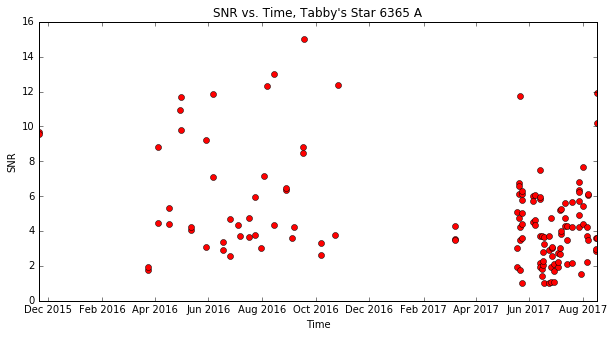

In [12]:
plt.figure(figsize=(10,5))
plt.plot(data["NewDate"], data["SNR"],'ro')
plt.ylabel('SNR')
plt.xlabel('Time')
plt.title("SNR vs. Time, Tabby's Star 6365 A")

In [13]:
# Add the data from the obslog.txt file to the main data frame
# Join on filename (changed from "ObsName")

obslog = pd.read_csv("obslog.txt", header='infer', delim_whitespace=True)
obslog["ObsName"] = obslog["ObsName"].map(lambda x: str(x)[1:]) # strip the "r" at beginning of file name
obslog["ObsName"] = obslog["ObsName"].str.replace('.','') + ".fits" # remove the "." and add ".fits"
obslog = obslog.rename(columns={ 'ObsName' : 'Filename'})
obslog.head()

,Star,Filename,BC,JD-2.44e6,"I2(o=y,t=n)"
0,KIC8462852T,amp193.fits,-14148.766,17347.613389,t
1,KIC8462852,amp194.fits,-14176.244,17347.635842,o
2,KIC8462852T,aot266.fits,9187.411,17471.941658,t
3,KIC8462852,aot271.fits,9180.307,17471.972596,o
4,KIC8462852T,aoz236.fits,11011.842,17482.901741,t


In [14]:
# Now remove path from the Filename in the main dataframe

data['Filename'] = data['Filename'].map(lambda x: str(x)[20:])
data.head()

,Filename,Date,Elevation,Azimuth,Intensity,Observation Time,SNR,NewDate
0,amp193.fits,2015-11-21T02:59:05.20,58.385700,296.272308,76.142857,1800.0,9.680418,2015-11-21 02:59:05.200
1,amp194.fits,2015-11-21T03:32:08.51,52.507401,297.008698,55.642857,1800.0,9.550406,2015-11-21 03:32:08.510
2,aot266.fits,2016-03-24T10:51:51.65,32.864101,56.171299,9.571429,1800.0,1.763978,2016-03-24 10:51:51.650
3,aot271.fits,2016-03-24T11:38:33.32,40.758099,59.581200,12.142857,1800.0,1.957226,2016-03-24 11:38:33.320
4,aoz236.fits,2016-04-04T09:55:09.85,30.658800,55.066799,55.714286,1800.0,4.475166,2016-04-04 09:55:09.850


In [15]:
# Combine the two dataframes together

results = pd.merge(data, obslog, left_on='Filename', right_on='Filename', how='inner')
results = results.drop_duplicates()
results.head()

,Filename,Date,Elevation,Azimuth,Intensity,Observation Time,SNR,NewDate,Star,BC,JD-2.44e6,"I2(o=y,t=n)"
0,amp193.fits,2015-11-21T02:59:05.20,58.385700,296.272308,76.142857,1800.0,9.680418,2015-11-21 02:59:05.200,KIC8462852T,-14148.766,17347.613389,t
2,amp194.fits,2015-11-21T03:32:08.51,52.507401,297.008698,55.642857,1800.0,9.550406,2015-11-21 03:32:08.510,KIC8462852,-14176.244,17347.635842,o
3,aot266.fits,2016-03-24T10:51:51.65,32.864101,56.171299,9.571429,1800.0,1.763978,2016-03-24 10:51:51.650,KIC8462852T,9187.411,17471.941658,t
5,aot271.fits,2016-03-24T11:38:33.32,40.758099,59.581200,12.142857,1800.0,1.957226,2016-03-24 11:38:33.320,KIC8462852,9180.307,17471.972596,o
6,aoz236.fits,2016-04-04T09:55:09.85,30.658800,55.066799,55.714286,1800.0,4.475166,2016-04-04 09:55:09.850,KIC8462852T,11011.842,17482.901741,t


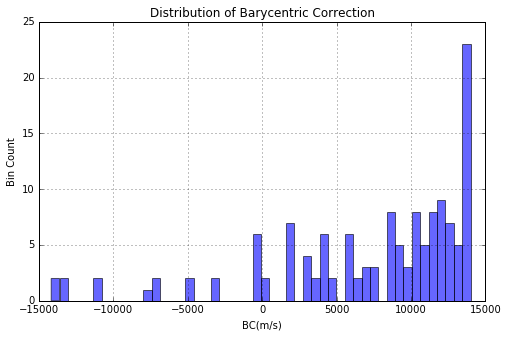

In [16]:
results["BC"].hist(bins=50, figsize=(8,5),alpha=0.6,edgecolor='black')
plt.xlabel("BC(m/s)")
plt.ylabel("Bin Count")
plt.title("Distribution of Barycentric Correction")

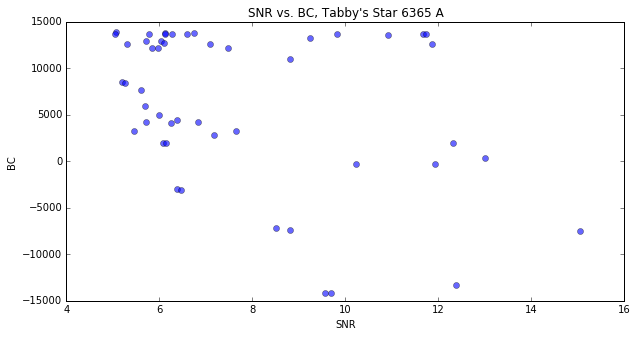

In [17]:
high_snr = results.loc[results['SNR'] > 5]

plt.figure(figsize=(10,5))
plt.plot(high_snr["SNR"], high_snr["BC"], 'ro', color='blue',alpha = 0.6)
plt.ylabel('BC')
plt.xlabel('SNR')
plt.title("SNR vs. BC, Tabby's Star 6365 A")

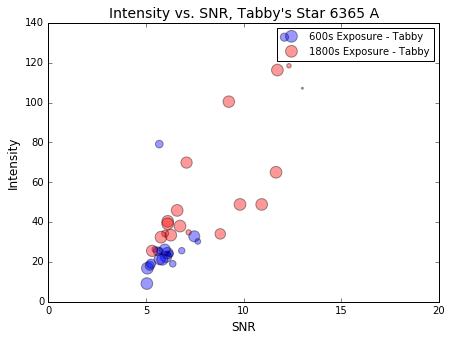

In [18]:
exp_600_high_snr = results.loc[(results['SNR'] > 5) & (results['Observation Time'] == 600.0)]
exp_1800_high_snr = results.loc[(results['SNR'] > 5) & (results['Observation Time'] == 1800.0)]
scale_factor = 100

plt.figure(figsize=(7,5))
plt.scatter(exp_600_high_snr["SNR"], exp_600_high_snr["Intensity"], s = exp_600_high_snr["BC"]/scale_factor,
            c = 'b', alpha = 0.4, picker=True, label="600s Exposure - Tabby")
plt.scatter(exp_1800_high_snr["SNR"], exp_1800_high_snr["Intensity"],  s = exp_1800_high_snr["BC"]/scale_factor,
            c = 'r', alpha = 0.4, picker=True, label="1800s Exposure - Tabby")
plt.ylabel('Intensity',fontsize=12)
plt.xlabel('SNR',fontsize=12)
plt.xlim(0,20)
plt.title("Intensity vs. SNR, Tabby's Star 6365 A",fontsize=14)
plt.legend(fontsize=10)

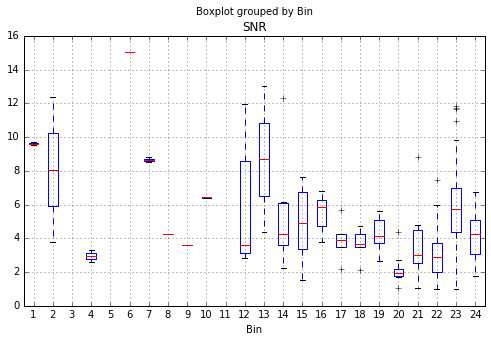

In [19]:
# Bin the BC values and then chart a boxplot of SNR values for these bins

bins = [-15000,-13750,-12500,-11250,-10000,-8750,-7500,-6250,-5000,-3750,-2500,
       -1250,0,1250,2500,3750,5000,6250,7500,8750,10000,11250,12500,13750,15000]

bin_names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

results['Bin'] = pd.cut(results['BC'], bins, labels=bin_names)

results.boxplot('SNR','Bin',figsize=(8,5));

In [20]:
# Create new column with image file names

results['Image_file'] = 'spectra_images/ucb-' + results['Filename']
results['Image_file'] = results['Image_file'].map(lambda x: str(x).replace('.fits','.jpeg'))

# Create another new column with the 1D spectrum image file names

results['1D'] = 'spectra_images/1D-ucb-' + results['Filename']
results['1D'] = results['1D'].map(lambda x: str(x).replace('.fits','.jpeg'))

# Set colors based on exposure time

results['Color'] = 'Black'
results.loc[results['Observation Time'] == 600.0, 'Color'] = 'Blue'
results.loc[results['Observation Time'] == 1800.0, 'Color'] = 'Red'

results.head()

,Filename,Date,Elevation,Azimuth,Intensity,Observation Time,SNR,NewDate,Star,BC,JD-2.44e6,"I2(o=y,t=n)",Bin,Image_file,1D,Color
0,amp193.fits,2015-11-21T02:59:05.20,58.385700,296.272308,76.142857,1800.0,9.680418,2015-11-21 02:59:05.200,KIC8462852T,-14148.766,17347.613389,t,1,spectra_images/ucb-amp193.jpeg,spectra_images/1D-ucb-amp193.jpeg,Red
2,amp194.fits,2015-11-21T03:32:08.51,52.507401,297.008698,55.642857,1800.0,9.550406,2015-11-21 03:32:08.510,KIC8462852,-14176.244,17347.635842,o,1,spectra_images/ucb-amp194.jpeg,spectra_images/1D-ucb-amp194.jpeg,Red
3,aot266.fits,2016-03-24T10:51:51.65,32.864101,56.171299,9.571429,1800.0,1.763978,2016-03-24 10:51:51.650,KIC8462852T,9187.411,17471.941658,t,20,spectra_images/ucb-aot266.jpeg,spectra_images/1D-ucb-aot266.jpeg,Red
5,aot271.fits,2016-03-24T11:38:33.32,40.758099,59.581200,12.142857,1800.0,1.957226,2016-03-24 11:38:33.320,KIC8462852,9180.307,17471.972596,o,20,spectra_images/ucb-aot271.jpeg,spectra_images/1D-ucb-aot271.jpeg,Red
6,aoz236.fits,2016-04-04T09:55:09.85,30.658800,55.066799,55.714286,1800.0,4.475166,2016-04-04 09:55:09.850,KIC8462852T,11011.842,17482.901741,t,21,spectra_images/ucb-aoz236.jpeg,spectra_images/1D-ucb-aoz236.jpeg,Red


In [21]:
output_file("snr-vs-intensity.html")

colors = results['Color']

source = ColumnDataSource(
        data=dict(
            x=results['SNR'],
            y=results['Intensity'],
            desc=results['Filename'],
            imgs = results['Image_file'],
            imgs_1D = results['1D'],
            obstime = results['Observation Time'],
            bc = results['BC'].astype(str)
        ))

hover = HoverTool( tooltips="""
    <div>
        <div>
            <img
                src="@imgs" height="90" alt="@imgs" width="200"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <img
                src="@imgs_1D" height="90" alt="@imgs_1D" width="200"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">@bc</span>
        </div>
    </div>
    """
)

p = figure(plot_width=600, plot_height=500, tools=[hover], title = "SNR vs. Intensity, Tabby's Star 6365 A",
          x_axis_label='SNR', y_axis_label='Intensity')

p.circle('x', 'y', size=5, alpha = 0.5, source=source, color=colors)

show(p)

In [22]:
output_file("snr-vs-bc.html")

high_snr = results.loc[results['SNR'] > 5]
colors = high_snr['Color']

source = ColumnDataSource(
        data=dict(
            x=high_snr['SNR'],
            y=high_snr['BC'],
            desc=high_snr['Filename'],
            imgs = high_snr['Image_file'],
            imgs_1D = high_snr['1D'],
            obstime = high_snr['Observation Time'],
            bc = high_snr['BC'].astype(str)
        ))

hover = HoverTool( tooltips="""
    <div>
        <div>
            <img
                src="@imgs" height="90" alt="@imgs" width="200"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <img
                src="@imgs_1D" height="90" alt="@imgs_1D" width="200"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">@bc</span>
        </div>
    </div>
    """
)

p = figure(plot_width=600, plot_height=500, tools=[hover], title = "SNR vs. BC, Tabby's Star 6365 A",
          x_axis_label='SNR', y_axis_label='BC')
p.y_range = Range1d(-20000,20000)

p.circle('x', 'y', size=5, alpha = 0.5, source=source, color=colors)

show(p)